In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Create a custom dataset with make_blobs and plot it
n_samples = 300
n_features = 2
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

In [3]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

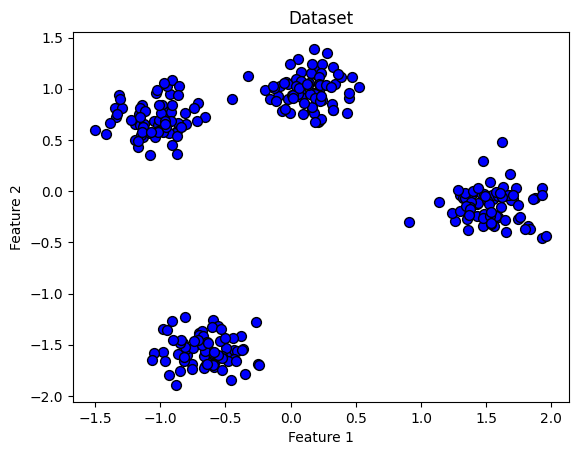

In [4]:
# Plot the dataset
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
# Step 3: Initialize random centroids
np.random.seed(42)
initial_centroids = X_scaled[np.random.choice(X_scaled.shape[0], n_clusters, replace=False)]

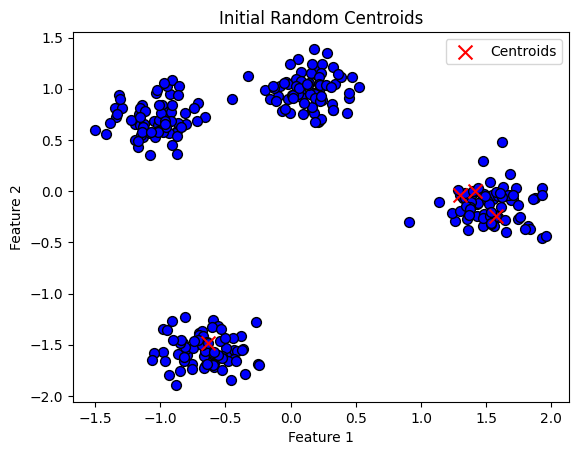

In [6]:
# Plot the random initialize center with data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Initial Random Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [7]:
# Step 4: Define Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [8]:
# Step 5: Create the function to Assign and Update the cluster center
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, n_clusters):
    new_centroids = []
    for i in range(n_clusters):
        cluster_points = X[clusters == i]
        new_centroid = cluster_points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [9]:
# Step 6: Create the function to Predict the cluster for the datapoints
def predict_clusters(X, centroids):
    return assign_clusters(X, centroids)

In [10]:
# Step 7: Assign, Update, and predict the cluster center
def kmeans(X, n_clusters, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, n_clusters)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

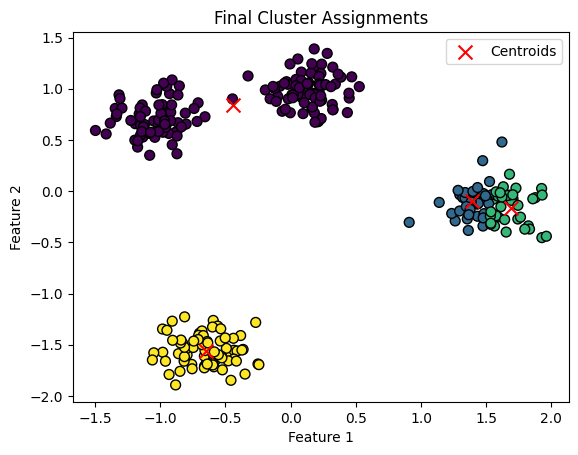

In [11]:
# Step 8: Plot the data points with their predicted cluster center
centroids, clusters = kmeans(X_scaled, n_clusters)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, marker='o', edgecolor='black', s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Final Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [12]:
# Step 9: Elbow Method
def calculate_wcss(X, n_clusters):
    centroids, clusters = kmeans(X, n_clusters)
    wcss = 0
    for i in range(n_clusters):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroids[i])**2)
    return wcss

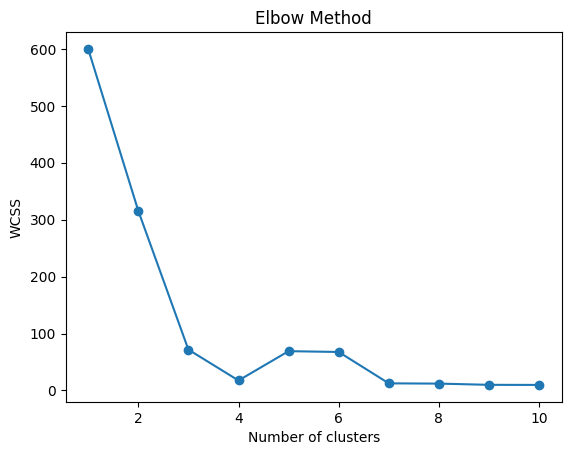

In [13]:
# Plot the Elbow graph to find the optimum number of cluster
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    wcss.append(calculate_wcss(X_scaled, i))

plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Step 10: Build the K-means clustering model with optimum number of clusters
optimal_clusters = 4  # Assuming the elbow point is at 4
centroids, clusters = kmeans(X_scaled, optimal_clusters)

In [15]:
# Step 11: Find the cluster center and predict the cluster group
print('Cluster Centers:', centroids)
predicted_clusters = predict_clusters(X_scaled, centroids)

Cluster Centers: [[-0.50210397 -1.59760522]
 [ 1.53816887 -0.12928168]
 [-0.44443482  0.84301818]
 [-0.80047274 -1.51480007]]


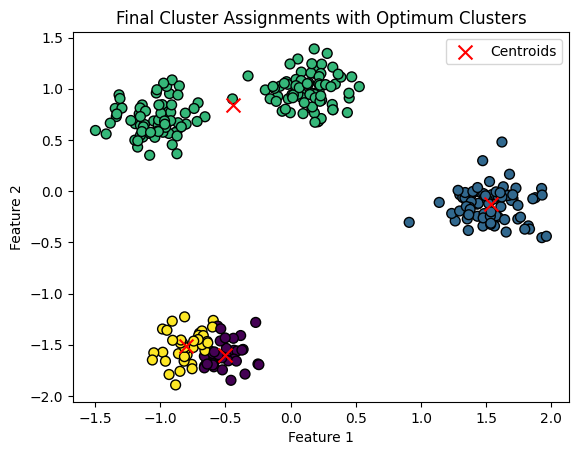

In [16]:
# Step 12: Plot the cluster center with data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predicted_clusters, marker='o', edgecolor='black', s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Final Cluster Assignments with Optimum Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()